<a href="https://colab.research.google.com/github/enesekin/Hate-speech-detection/blob/main/End2End_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### End 2 End NLP Project
+ Emotion Detection In Text 
+ Text Classifier

In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns

In [ ]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 7.6 MB/s 


In [ ]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
%cd /content/drive/My Drive/notebooks/

/content/drive/My Drive/notebooks


In [ ]:
df = pd.read_csv("racism-model.csv")

In [ ]:
df.head()

,text,label
0,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,1
1,My horses are retarded https://t.co/HYhqc6d5WN,0
2,â€œNIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL...,0
3,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,1
4,â€œEVERYbody calling you Nigger now!â€ https:...,1


In [ ]:
# Value Counts
df['label'].value_counts()

0    99828
1    49876
Name: label, dtype: int64

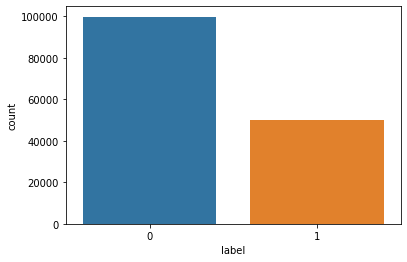

In [ ]:
# Plot
sns.countplot(x='label',data=df)

In [ ]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# User handles
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df

,text,label,Clean_Text
0,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,1,Nigga https://t.co/cAsaLWEpue
1,My horses are retarded https://t.co/HYhqc6d5WN,0,horses retarded https://t.co/HYhqc6d5WN
2,â€œNIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL...,0,â€œNIGGA MOMMA YOUNGBOY SPITTING REAL SHIT NIG...
3,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,1,RT xxSuGVNGxx: ran HOLY NIGGA TODAY ðŸ˜­ðŸ˜­ðŸ...
4,â€œEVERYbody calling you Nigger now!â€ https:...,1,â€œEVERYbody calling Nigger now!â€ https://t....
...,...,...,...
149699,@svdate @gtconway3d I would just say hes Donny...,0,hes Donny retard https://t.co/R6gFvP34pv
149700,@Cheftime_Dev congrats my nigga keep on grindi...,0,congrats nigga grinding https://t.co/MZhzjbL5nB
149701,My nigga big shitty https://t.co/e0snJGBgH9,1,nigga big shitty https://t.co/e0snJGBgH9
149702,did she just say â€œmy niggaâ€ to Rich? &amp;...,1,â€œmy niggaâ€ Rich? &amp; said anger? mmph. #...


In [ ]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['label']

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6788386177413609

In [ ]:
# Make A Prediction
ex1 = "people"

In [ ]:
pipe_lr.predict([ex1])

array([0])

In [ ]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.60400188e-03, 7.06107105e-03, 6.95869391e-03, 9.43791201e-01,
        1.00434039e-04, 2.63452144e-02, 6.64720844e-05, 1.40729114e-02]])

In [ ]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()